# Road Accidents in Victoria
---

### Visualization & Analytic Infographics of road crashes' data recorded in Victoria , Australia 

__Period: Last Five Years (`July 2013 – Dec 2018`)__  
__Data Source: VicRoad  [Linked Here](https://vicroadsopendata-vicroadsmaps.opendata.arcgis.com/datasets/c2a69622ebad42e7baaa8167daa72127_0/geoservice#)__  
___

In [1]:
import pandas as pd
import numpy as np
#pd.set_option('max_rows', 80000)
#pd.set_option('max_columns', 70)

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])

import folium as flm
import json

from wordcloud import WordCloud
from PIL import Image

In [2]:
def SaveData(file_name):
    location = "/home/sakima/Documents/Projects/VicDrive/{}.csv".format(file_name)
    df.to_csv(location)
    
def MapSave(map_name, file_name):
    location = "/home/sakima/Desktop/maps/{}.html".format(file_name)
    map_name.save(location)
    
def ScaleMapper(valmax, valmin, rangmax, rangmin, number):
    scalednumber = int(round(((number-valmin)/(valmax-valmin)*(rangmax-rangmin))+rangmin))
    return(scalednumber)

In [3]:
#url = "https://opendata.arcgis.com/datasets/c2a69622ebad42e7baaa8167daa72127_0.csv?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D"
#df = pd.read_csv(url)
df = pd.read_csv("vicroad_dataset.csv", index_col=0)

In [4]:
# Data Wrangling

date_time_str = df['ACCIDENT_DATE']+ ' '+ df['ACCIDENT_TIME']
df['DATE_TIME'] = pd.to_datetime(date_time_str, format='%d/%m/%Y %H.%M.%S')

df.drop(labels=['ACCIDENT_DATE', 'ACCIDENT_TIME', 'OBJECTID', 
                'ACCIDENT_NO', 'ABS_CODE', 'ACCIDENT_STATUS', 
                'NODE_ID', 'X', 'Y', 'VICGRID_X', 'VICGRID_Y', 
                'DEG_URBAN_ALL', 'LGA_NAME_ALL', 'REGION_NAME_ALL', 
                'SRNS_ALL', 'RMA_ALL', 'DIVIDED', 'DIVIDED_ALL', 'STAT_DIV_NAME'], axis=1, inplace=True)
                

df.rename({'LGA_NAME': 'LOCAL_GOV_AREA'}, axis=1, inplace=True)

df.set_index('DATE_TIME', drop=True, inplace=True)
df.sort_index(axis=0, ascending=True, inplace=True)


In [5]:
df.columns

Index(['ALCOHOLTIME', 'ACCIDENT_TYPE', 'DAY_OF_WEEK', 'DCA_CODE',
       'HIT_RUN_FLAG', 'LIGHT_CONDITION', 'POLICE_ATTEND', 'ROAD_GEOMETRY',
       'SEVERITY', 'SPEED_ZONE', 'RUN_OFFROAD', 'LONGITUDE', 'LATITUDE',
       'NODE_TYPE', 'LOCAL_GOV_AREA', 'REGION_NAME', 'TOTAL_PERSONS',
       'INJ_OR_FATAL', 'FATALITY', 'SERIOUSINJURY', 'OTHERINJURY',
       'NONINJURED', 'MALES', 'FEMALES', 'BICYCLIST', 'PASSENGER', 'DRIVER',
       'PEDESTRIAN', 'PILLION', 'MOTORIST', 'UNKNOWN', 'PED_CYCLIST_5_12',
       'PED_CYCLIST_13_18', 'OLD_PEDESTRIAN', 'OLD_DRIVER', 'YOUNG_DRIVER',
       'ALCOHOL_RELATED', 'UNLICENCSED', 'NO_OF_VEHICLES', 'HEAVYVEHICLE',
       'PASSENGERVEHICLE', 'MOTORCYCLE', 'PUBLICVEHICLE', 'DEG_URBAN_NAME',
       'SRNS', 'RMA'],
      dtype='object')

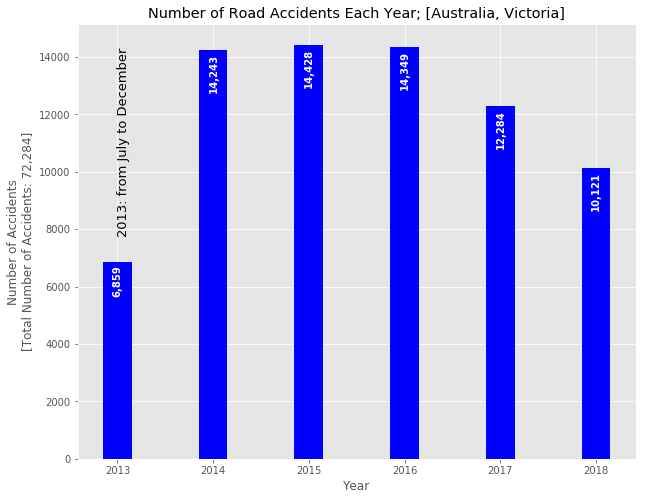

In [6]:
years = [2013, 2014, 2015, 2016, 2017, 2018]
acc_per_year = df.groupby(df.index.year).size().tolist()

fig = plt.figure(figsize=(10,8))
ax0 = fig.add_subplot(111)
plt.bar(years, acc_per_year, width=0.3, color='b')
ax0.set_title('Number of Road Accidents Each Year; [Australia, Victoria]')
ax0.set_xlabel('Year')
ax0.set_ylabel('Number of Accidents\n[Total Number of Accidents: 72,284]')
for index, value in enumerate(acc_per_year):
    amount=format(value, ',')
    plt.annotate(amount, 
                 xy=(years[index]-0.05, value-400),
                 color='w', 
                 rotation=90, 
                 fontsize=10,  
                 fontweight='bold')
plt.annotate('2013: from July to December', 
             xy=(2013, 14000), 
             xycoords='data', 
             fontsize=13, 
             rotation=90)
plt.show()
plt.close()

# >>> Note: year 2013 includes just last six months
# >>> Total number of accidents: 72284

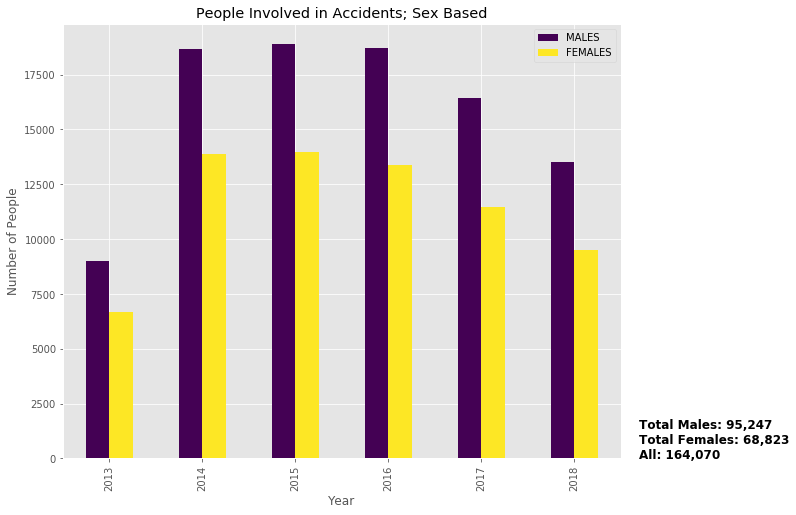

In [7]:
sex_involved = df.groupby(df.index.year)['MALES', 'FEMALES'].sum()

sum_male = sex_involved['MALES'].sum()
sum_female = sex_involved['FEMALES'].sum()
all_inv = sum_female + sum_male

fig = plt.figure(figsize=(10,8))
ax0 = fig.add_subplot(111)
sex_involved.plot(kind='bar', 
                  ax=ax0, colormap='viridis')

ax0.set_title('People Involved in Accidents; Sex Based')
ax0.set_ylabel('Number of People')
ax0.set_xlabel('Year')

text = "Total Males: {:,}\nTotal Females: {:,}\nAll: {:,}".format(sum_male, sum_female, all_inv)
plt.annotate(text, 
             xy=(5.7, 0), 
             xycoords='data', 
             rotation=0, 
             fontsize=12, 
             fontweight='bold', 
             annotation_clip=False)

plt.show()
plt.close()

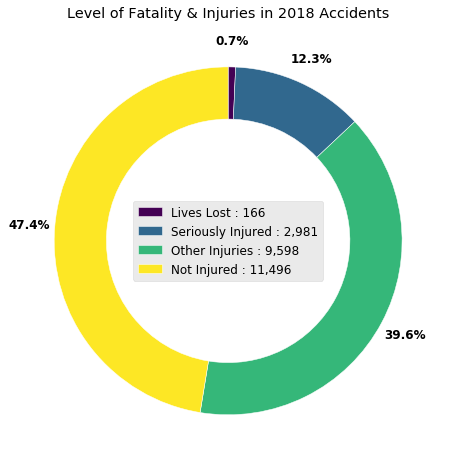

In [8]:
#year = int(input('Enter the year :'))
year = 2018

df_injury = df.groupby(df.index.year)['FATALITY', 'SERIOUSINJURY', 'OTHERINJURY', 
                                      'NONINJURED'].sum().T

legends = ['Lives Lost', 'Seriously Injured', 'Other Injuries', 'Not Injured']
labels = []
for i, value in enumerate(df_injury[year]):
    labels.append(legends[i] + ' : {:,}'.format(value))

df_injury.plot(kind='pie', 
               y=year, 
               figsize=(8, 8), 
               startangle=90, 
               counterclock=False,
               labels=None, 
               colormap='viridis', 
               rotatelabels=True, 
               wedgeprops=dict(width=0.3, edgecolor='w'), 
               autopct='%1.1f%%', 
               pctdistance=1.15, 
               textprops=dict(color="k", size='12', weight='bold'))

plt.title('Level of Fatality & Injuries in {} Accidents'.format(year))
plt.legend(labels, loc='center', fontsize='large')
plt.ylabel("")
#plt.annotate(year, xy=(-0.12,-0.4), xycoords='data', fontsize=14, fontweight='bold')
plt.show()
plt.close()

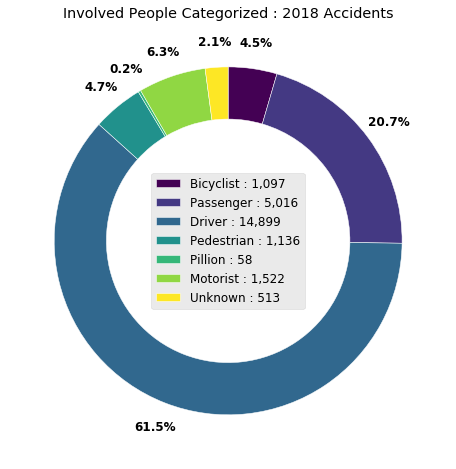

In [9]:
year = 2018

df_categories = df.groupby(df.index.year)['BICYCLIST', 'PASSENGER', 'DRIVER', 
                                   'PEDESTRIAN', 'PILLION', 'MOTORIST', 'UNKNOWN'].sum().T

legends= ['Bicyclist', 'Passenger', 'Driver', 'Pedestrian', 'Pillion', 'Motorist', 'Unknown']
labels = []
for i, value in enumerate(df_categories[year]):
    labels.append(legends[i] + ' : {:,}'.format(value))

df_categories.plot(kind='pie', 
                   y=year, 
                   figsize=(8,8), 
                   colormap='viridis', 
                   labels=None, 
                   startangle=90, 
                   counterclock=False, 
                   rotatelabels=True, 
                   wedgeprops=dict(width=0.3, edgecolor='w'), 
                   autopct='%1.1f%%', 
                   pctdistance=1.15, 
                   textprops=dict(color="k", size='12', weight='bold'))

plt.ylabel('')
plt.title('Involved People Categorized : {} Accidents'.format(year))
plt.legend(labels, loc='center', fontsize='large')
plt.show()
plt.close()

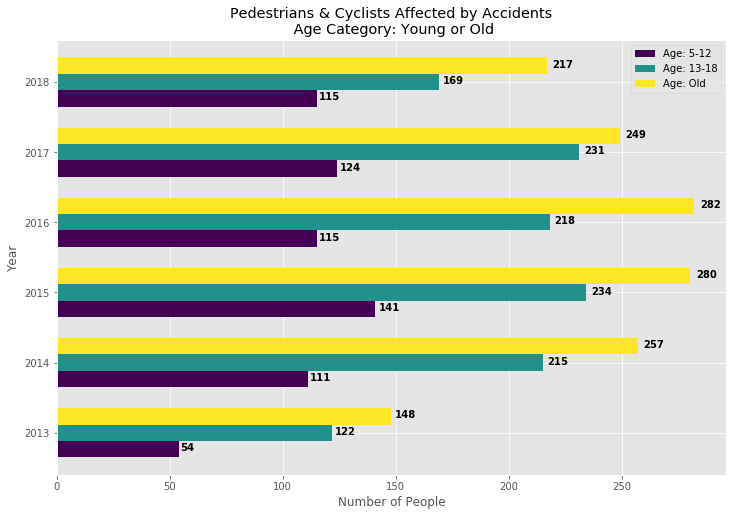

In [10]:
df_pedcyc = df.groupby(df.index.year)['PED_CYCLIST_5_12', 'PED_CYCLIST_13_18', 
                                      'OLD_PEDESTRIAN'].sum()

labels=['Age: 5-12', 'Age: 13-18', 'Age: Old']

fig ,axs = plt.subplots()
chart1 = df_pedcyc.plot(kind='barh', 
                       width=0.7, 
                       figsize=(12, 8), 
                       colormap='viridis', 
                       ax=axs)

plt.xlabel('Number of People')
plt.ylabel('Year')
plt.legend(labels)
plt.title('Pedestrians & Cyclists Affected by Accidents\n Age Category: Young or Old')

for bar in chart1.patches:
    width = bar.get_width()
    height = bar.get_height()
    y = bar.get_y()
    axs.text(1.01*width, y+0.4*height, '{}'.format(width), fontdict=dict(weight='bold'))

plt.show()
plt.close()

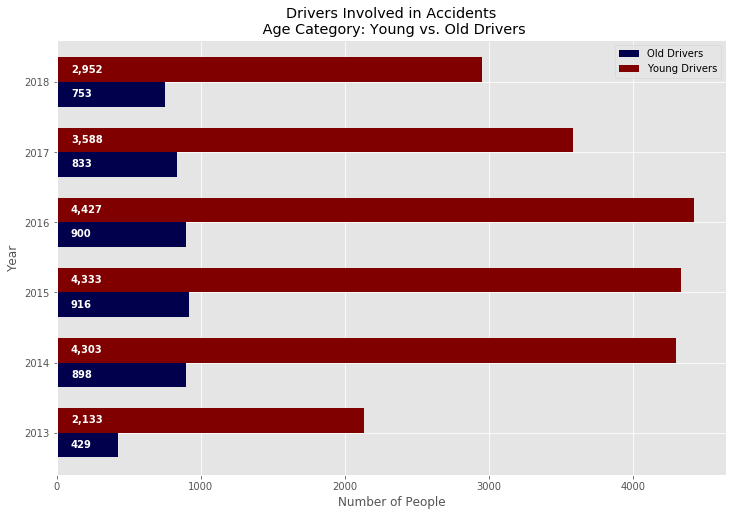

In [11]:
df_drivers = df.groupby(df.index.year)['OLD_DRIVER', 'YOUNG_DRIVER'].sum()

labels=['Old Drivers', 'Young Drivers']

fig ,axs = plt.subplots()
chart2 = df_drivers.plot(kind='barh', 
                         width=0.7, 
                         figsize=(12, 8), 
                         colormap='seismic', 
                         ax=axs)

plt.xlabel('Number of People')
plt.ylabel('Year')
plt.legend(labels)
plt.title('Drivers Involved in Accidents\n Age Category: Young vs. Old Drivers')

for bar in chart2.patches:
    width = bar.get_width()
    height = bar.get_height()
    y = bar.get_y()
    axs.text(100, y+0.4*height, '{:,}'.format(width), fontdict=dict(weight='bold', color='w'))

plt.show()
plt.close()

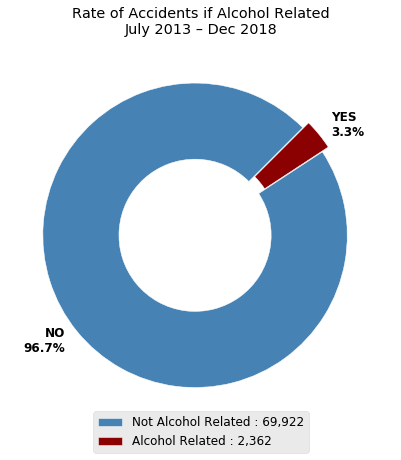

In [12]:
alcohol_list = df[['ALCOHOL_RELATED']].groupby(['ALCOHOL_RELATED']).size().tolist()

labels=['NO\n{:.1%}'.format(alcohol_list[0]/sum(alcohol_list)), 
        'YES\n{:.1%}'.format(alcohol_list[1]/sum(alcohol_list))]

fig, axs = plt.subplots(figsize=(7,7))

axs.pie(alcohol_list, 
        startangle=45, 
        explode=[0.05, 0], 
        colors=['steelblue', 'darkred'], 
        textprops=dict(weight='bold', color='k', size=12), 
        labels=labels, 
        wedgeprops=dict(width=0.5, edgecolor='w'))

plt.title('Rate of Accidents if Alcohol Related\nJuly 2013 – Dec 2018')
plt.legend(['Not Alcohol Related : {:,}'.format(alcohol_list[0]), 
            'Alcohol Related : {:,}'.format(alcohol_list[1])], 
           loc='lower center', 
           fontsize='large', 
           bbox_to_anchor=(0.5,-0.1))

plt.show()
plt.close()

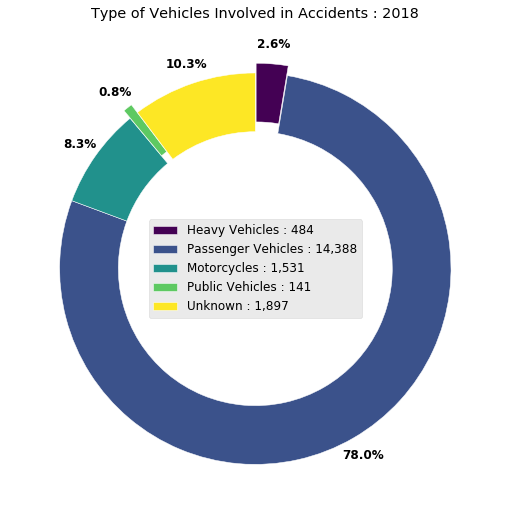

In [13]:
df_vehicle_all = df.groupby(df.index.year)['NO_OF_VEHICLES', 'HEAVYVEHICLE', 'PASSENGERVEHICLE', 
                                       'MOTORCYCLE', 'PUBLICVEHICLE'].sum()

df_vehicle_reported = df.groupby(df.index.year)['HEAVYVEHICLE', 'PASSENGERVEHICLE', 'MOTORCYCLE', 
                                                'PUBLICVEHICLE'].sum().sum(axis=1)

df_vehicle_all['UNKNOWNVEHICLE'] = df_vehicle_all['NO_OF_VEHICLES'] - df_vehicle_reported

df_vehicle = df_vehicle_all[['HEAVYVEHICLE', 'PASSENGERVEHICLE', 
                             'MOTORCYCLE', 'PUBLICVEHICLE', 'UNKNOWNVEHICLE']].T




year = 2018
df_vehicle.plot(kind='pie', 
                y=year, 
                figsize=(9,9), 
                startangle=90, 
                counterclock=False, 
                labels=None, 
                colormap='viridis', 
                wedgeprops=dict(width=0.3, edgecolor='w'), 
                autopct='%1.1f%%', 
                pctdistance=1.1, 
                textprops=dict(size=12, weight='bold'), 
                explode=[0.05, 0, 0, 0.05, 0])

labels=['Heavy Vehicles', 'Passenger Vehicles', 'Motorcycles', 'Public Vehicles', 'Unknown']
legends = []
for i, value in enumerate(df_vehicle[year]):
    legends.append(labels[i] + ' : {:,}'.format(value))

plt.title('Type of Vehicles Involved in Accidents : {}'.format(year))
plt.ylabel('')
plt.legend(legends, fontsize='large', loc='center')

plt.show()
plt.close()

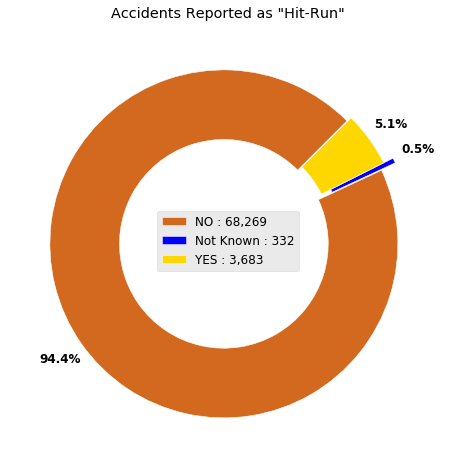

In [14]:
hit_run = df.groupby(df['HIT_RUN_FLAG']).size().tolist()
hit_run_list=['NO', 'Not Known', 'YES']

legends = []
for i in range(0,3):
    legends.append(hit_run_list[i] + ' : {:,}'.format(hit_run[i]))

fig, axs = plt.subplots(figsize=(8,8))
axs.pie(hit_run, 
        colors=['chocolate', 'b', 'gold'], 
        startangle=45, 
        explode=[0.03, 0.06, 0], 
        wedgeprops=dict(width=.4, edgecolor='w'), 
        autopct='%1.1f%%', 
        pctdistance=1.15, 
        textprops=dict(size=12, weight='bold'))

plt.title('Accidents Reported as "Hit-Run"')
plt.legend(legends, loc='center', fontsize='large')

plt.show()
plt.close()

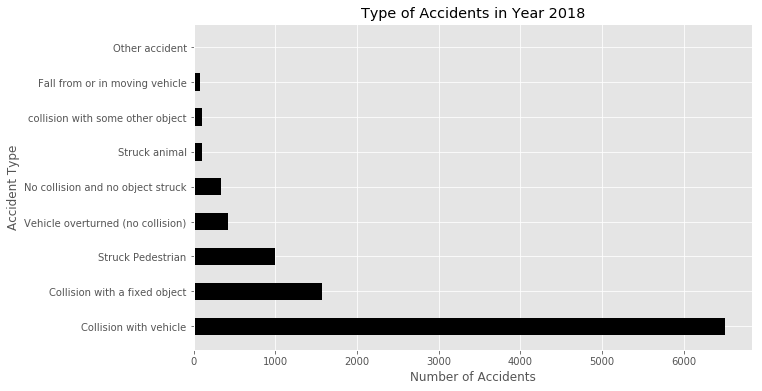

In [15]:
year =2018
acc_type_series = df[df.index.year == year]['ACCIDENT_TYPE'].value_counts()

acc_type_num = acc_type_series.tolist()
acc_type_ticks = acc_type_series.index.tolist()
acc_type_coord = np.arange(len(acc_type_ticks))

fig, axs = plt.subplots(figsize=(10, 6))
axs.barh(acc_type_coord, 
         acc_type_num, 
         height=0.5, 
         color='k', 
         tick_label=acc_type_ticks)

plt.title('Type of Accidents in Year {}'.format(year))
plt.xlabel('Number of Accidents')
plt.ylabel('Accident Type')

plt.show()
plt.close()

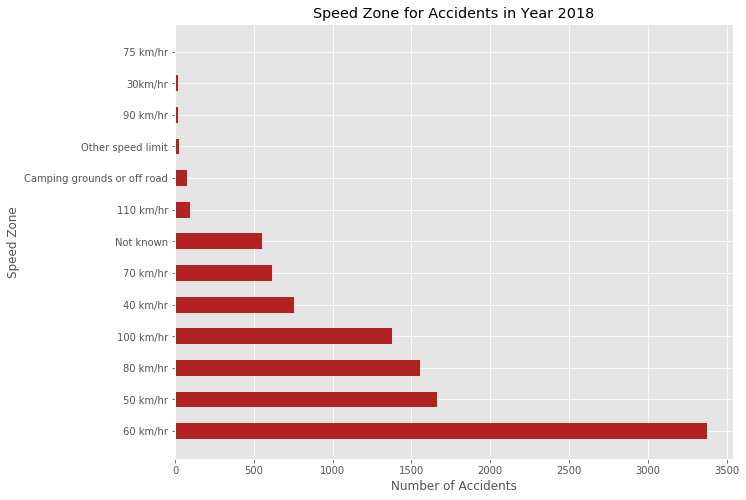

In [16]:
year =2018
speed_zone_series = df[df.index.year == year]['SPEED_ZONE'].value_counts()

speed_zone_num = speed_zone_series.tolist()
speed_zone_ticks = speed_zone_series.index.tolist()
speed_zone_coord = np.arange(len(speed_zone_ticks))

fig, axs = plt.subplots(figsize=(10, 8))
axs.barh(speed_zone_coord, 
         speed_zone_num, 
         height=0.5, 
         color='firebrick', 
         tick_label=speed_zone_ticks)

plt.title('Speed Zone for Accidents in Year {}'.format(year))
plt.xlabel('Number of Accidents')
plt.ylabel('Speed Zone')

plt.show()
plt.close()

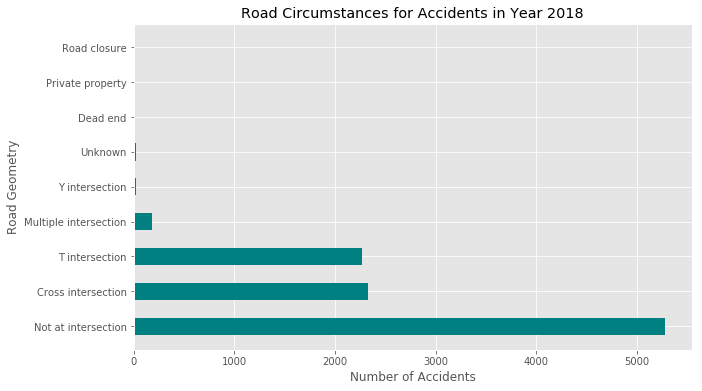

In [17]:
year =2018
road_geo_series = df[df.index.year == year]['ROAD_GEOMETRY'].value_counts()

road_geo_num = road_geo_series.tolist()
road_geo_ticks = road_geo_series.index.tolist()
road_geo_coord = np.arange(len(road_geo_ticks))

fig, axs = plt.subplots(figsize=(10, 6))
axs.barh(road_geo_coord, 
         road_geo_num, 
         height=0.5, 
         color='teal', 
         tick_label=road_geo_ticks)

plt.title('Road Circumstances for Accidents in Year {}'.format(year))
plt.xlabel('Number of Accidents')
plt.ylabel('Road Geometry')

plt.show()
plt.close()

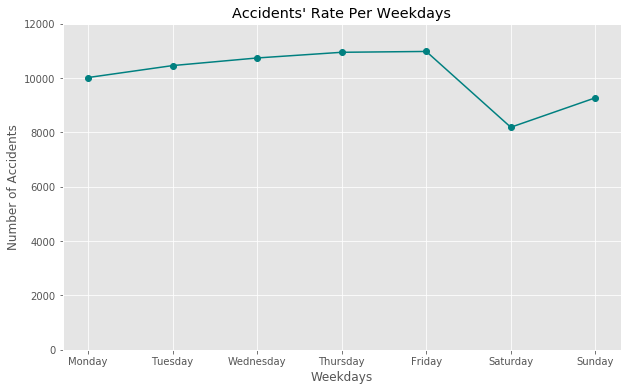

In [18]:
list_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
series_acc_per_weekdays = df['DAY_OF_WEEK'].value_counts()
list_acc_per_weekdays = []

for day in list_weekdays:
    list_acc_per_weekdays.append(series_acc_per_weekdays[day])
    
fig, axs = plt.subplots(figsize=(10, 6))

'''
axs.bar(list_weekdays, 
        list_acc_per_weekdays, 
        width=0.4, color='teal')
'''

axs.plot(list_weekdays, list_acc_per_weekdays, 'o-', color='teal')

plt.title("Accidents' Rate Per Weekdays")
plt.xlabel('Weekdays')
plt.ylabel('Number of Accidents')
plt.ylim(0, 12000)

plt.show()
plt.close()

---

### Accidents Rate in Melburne Urban Areas

In [19]:
df_melbourne = df[(df['DEG_URBAN_NAME']=='MELB_URBAN') | 
                  (df['DEG_URBAN_NAME']=='MELBOURNE_CBD')][['LOCAL_GOV_AREA', 'LATITUDE', 'LONGITUDE']]

mel_coords_mean_df = df_melbourne.groupby('LOCAL_GOV_AREA')[['LATITUDE', 'LONGITUDE']].mean()

mel_coords_mean_list = mel_coords_mean_df.values.tolist()
mel_accnum_list = df_melbourne['LOCAL_GOV_AREA'].value_counts().sort_index().values.tolist()
mel_area_list = df_melbourne['LOCAL_GOV_AREA'].value_counts().sort_index().index.tolist()

vicmap1 = flm.Map(location=[-37.9136, 144.9631], zoom_start=10, tiles='Stamen Toner')

for area in range(len(mel_area_list)):
    flm.Circle(
        location=mel_coords_mean_list[area], 
        radius=mel_accnum_list[area], 
        fill=False, 
        fill_color='#3186cc', 
        fill_opacity=0.4, 
        tooltip=mel_area_list[area]
    ).add_to(vicmap1)

vicmap1

---

### Number of Accidents in Victoria Major Municipality Areas

In [20]:
mel_area_series = df[(df['DEG_URBAN_NAME'] == 'LARGE_PROVINCIAL_CITIES') | 
                     (df['DEG_URBAN_NAME']=='MELBOURNE_CBD') | 
                     (df['DEG_URBAN_NAME']=='MELB_URBAN')][['LOCAL_GOV_AREA']].groupby('LOCAL_GOV_AREA').size()
mel_area_df = mel_area_series.to_frame()
mel_area_df.drop(labels=' ', axis=0, inplace=True)
mel_area_df.rename({0: 'NUMBER_OF_ACCIDENT'}, axis=1, inplace=True)
mel_area_df.reset_index(inplace=True)

vicmap2 = flm.Map(location=[-37.5136, 144.9631], zoom_start=8, tiles='OpenStreetMap')

aus_lga_geopath = "/home/sakima/Documents/Projects/VicDrive/aus_lga.json"
with open (aus_lga_geopath) as data:
    aus_geo = json.load(data)
    
flm.Choropleth(
    geo_data=aus_geo, 
    name='choropleth', 
    data=mel_area_df, 
    columns=['LOCAL_GOV_AREA', 'NUMBER_OF_ACCIDENT'], 
    key_on='feature.properties.Name', 
    fill_color='OrRd', 
    fill_opacity=0.8, 
    line_opacity=0.2, 
    nan_fill_color='white', 
    nan_fill_opacity=0.2, 
    legend_name='Number of Accidents in Victoria Major Municipality Areas', 
    bins=[100, 500, 1000, 1500, 2500, 3500, 4500]
).add_to(vicmap2)
    
vicmap2

---

### Lives Lost in Victoria due to Road Crashes

In [21]:
# Total Lives Lost = 1346

lives_lost_coords = df[df['FATALITY'] > 0][['LATITUDE', 'LONGITUDE']].values.tolist()

vicmap3 = flm.Map(location=[-36.7136, 144.9631], zoom_start=7, tiles='OpenStreetMap')

for coord in lives_lost_coords:
    flm.Circle(
        location=coord, 
        radius=10, 
        color='darkred', 
        fill=True, 
        fill_color='darkred', 
        fill_opacity=0.5, 
    ).add_to(vicmap3)


vicmap3

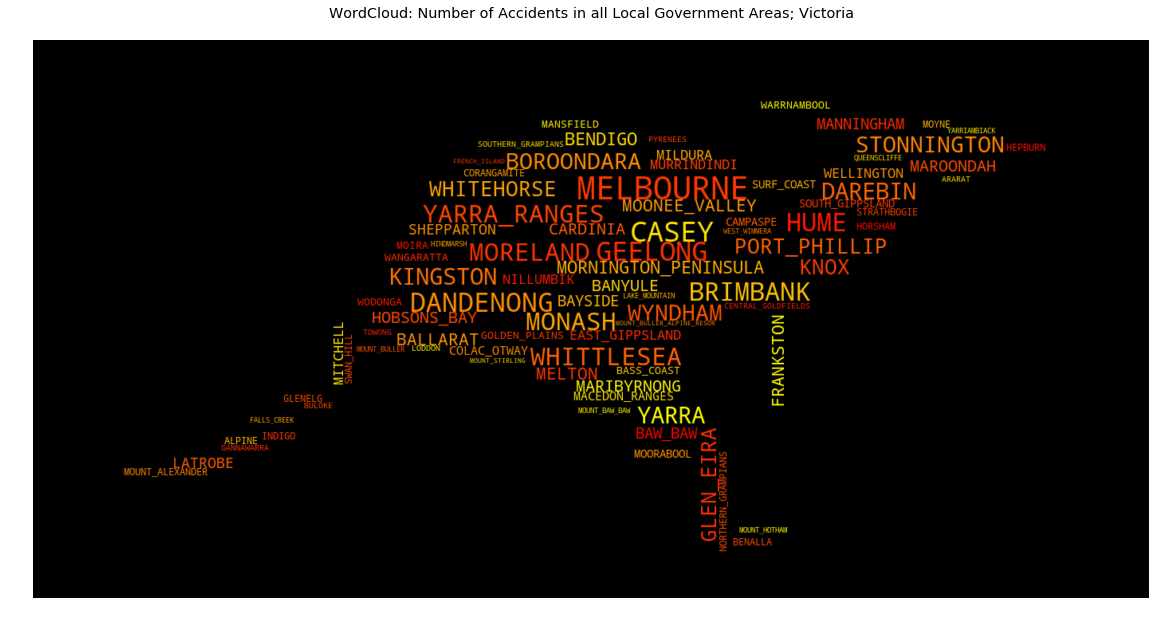

In [22]:
lga_all = df['LOCAL_GOV_AREA'].value_counts()

valmax = max(lga_all)
valmin = min(lga_all)

text=''

for item in lga_all.items():
    if item[0] == ' ':
        pass
    elif len(item[0].split(' ')) != 1:
        urban = '_'.join(item[0].split(' '))
        text += (urban + ' ')*ScaleMapper(valmax, valmin, 200, 10, item[1])
    else:
        text += (item[0] + ' ')*ScaleMapper(valmax, valmin, 200, 10, item[1])
        
wc_mask = np.array(Image.open("mask.jpg"))
        
wcloud = WordCloud(
    background_color='black', 
    collocations=False, 
    colormap='autumn', 
    max_font_size=40, 
    mask = wc_mask
)

wcloud.generate(text)

fig = plt.figure(figsize=(20, 15))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud: Number of Accidents in all Local Government Areas; Victoria\n')
plt.show()
plt.close()